# Ensemble Method Implementation : Random Forest Classifier

In machine learning, ensemble methods are strategies that merge several independent models to produce a more potent and reliable model. The purpose of ensemble methods is to increase overall predictive performance by utilizing the diversity of the constituent models.
Here, a popular Ensemble method is used for our Vehicle Motion Classification Problem: **Random Forest Classifier**

Three datasets are used, 

Dataset 1 : Used for training and testing (training_set)

Dataset 2 : Used for independent testing (testing_set 1)

Dataset 3 : Used for independent testing (testing_set 2)

***


## Preparing training and testing sets

In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Reading training dataset
training_set = pd.read_csv('data/training.csv')
training_set.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,straight,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,straight,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,rest,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,rest,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,straight,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [278]:
#Separating the feature matrix (X) and target vector (y)
y = training_set['motion_state'].copy()
X = training_set[[col for col in training_set.columns if col !='motion_state']].copy()
print("Feature matrix :")
print(X.head())
print("\n")
print("Target vector: ")
print(y.head())

Feature matrix :
    adt_sum   gdt_sum  axdt_var  aydt_var  azdt_var      gxdt_var  \
0  9.498792  0.008515  0.000004  0.000001  0.000006  3.856139e-09   
1  9.799902  0.008413  0.000004  0.000001  0.000007  3.463234e-09   
2  9.792245  0.009893  0.000004  0.000001  0.000007  3.881253e-09   
3  9.796759  0.009319  0.000004  0.000001  0.000008  3.439800e-09   
4  9.806574  0.009778  0.000003  0.000008  0.000006  5.623301e-09   

       gydt_var      gzdt_var   adt_var       gdt_var   adt_min   gdt_min  \
0  2.467973e-09  1.958251e-09  0.000006  1.076465e-09  0.093785  0.000026   
1  2.769963e-09  1.785013e-09  0.000006  1.299795e-09  0.094010  0.000015   
2  3.281482e-09  3.870479e-09  0.000007  1.794662e-09  0.093513  0.000010   
3  3.309496e-09  2.681825e-09  0.000008  1.547565e-09  0.093461  0.000017   
4  2.478434e-09  2.738851e-09  0.000006  1.621392e-09  0.093818  0.000032   

    adt_max   gdt_max  
0  0.101785  0.000171  
1  0.101634  0.000167  
2  0.101982  0.000219  
3  0.1023

In [279]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [280]:
#Splitting the training dataset into training and test segments for the ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Utilising GridSearchCV with a Pipeline 
#### (Reference from course notes: Pipeline_steps.ipynb)

**GridSearchCv** from the scikit-learn library performs a grid search and cross validation.

__Grid Search__ : 
- systematically explores predefined hyperparameter values to find the optimal combination for a machine learning model.
- helps in tuning model parameters to improve performance metrics

__Cross Validation__ :
- splits the dataset into multiple subsets and evaluating the model on each subset
- helps reduce the risk of overfitting and ensures better generalization

Therefore, GridSearchCV automates the process of hyperparameter tuning while ensuring a reliable estimate of the model's performance through cross-validation.

***

A **Pipeline** is a sequence of data processing steps combined into a single workflow, where the output of each step is the input to the next.

When combining GridSearchCV with a Pipeline, the general steps followed are as follows:
1. Define Pipeline
    - Pipelines are defined, comprising preprocessing transformers and a machine learning model.

2. Define Parameter Grid
    - Hyperparameter grids for the model in the pipeline are specified.

3. Instantiate GridSearchCV
    - GridSearchCV objects are instantiated, incorporating the pipeline and parameter grids, along with the desired number of cross-validation folds.

4. Fit GridSearchCV
    - GridSearchCV objects are fitted to the training data.

5. Get Best Estimator
    - Best estimators, representing the pipeline with optimal hyperparameters, are obtained from the GridSearchCV objects.

6. Print Results
    - Best parameters, training and validation scores are printed, and the best model may be evaluated on the test set if needed.

***

## Random Forest Classifier (RFC)
#### (Reference from course notes : Random Forest Example.ipynb)

**Random Forest Classifier (RFC)** is an ensemble learning method used for classification tasks.
- constructs multiple decision trees during training with injected randomness, so that each tree is different
- provides a probability for each possible output label, and the probabilities for all trees are averaged for prediction, thus reducing chances of overfitting
- performs parallel computing by default for all trees

Parameters used for Random Forest Classifier here : 
1. *n_estimators* = determines number of decision trees to be used in the forest. Increasing n_estimators decreases the chance of overfitting, however increases computational cost.
2. *max_depth* = sets the maximum depth of each tree in the forest. Increasing max_depth increases the chances of overfitting.
***

In [281]:
# 1. Define Pipeline for Random Forest Classifier
pipe_RFC = Pipeline([('classifier',RandomForestClassifier())])

In [282]:
# 2. Define Parameter Grid for Random Forest Classifier
param_grid_RFC ={
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [2, 5, 10, 50],
        'classifier__max_depth': [ 2, 3, 5, 10, 50 , 100]
    }

In [283]:
# 3. Instantiate GridSearchCV
grid_RFC = GridSearchCV(pipe_RFC, param_grid_RFC, cv=5, return_train_score=True, scoring='roc_auc_ovo_weighted')

# 4. Fit GridSearchCV
grid_RFC.fit(X_train, y_train)

# 5. Get Best Estimator for Random Forest Classifier
RFC_best_estimator = grid_RFC.best_estimator_

In [284]:
# Print Results for Random Forest Classifier
print("Random Forest Classifier :")
print("Best parameters:\n{}\n".format(grid_RFC.best_params_))
print("Best CV train score: {:.6f}".format(grid_RFC.cv_results_['mean_train_score'][grid_RFC.best_index_]))
print("Best CV validation score: {:.6f}".format(grid_RFC.best_score_))
print("Test set score: {:.6f}".format(grid_RFC.score(X_test, y_test)))

Random Forest Classifier :
Best parameters:
{'classifier': RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42), 'classifier__max_depth': 10, 'classifier__n_estimators': 50}

Best CV train score: 1.000000
Best CV validation score: 0.963481
Test set score: 0.956884


***

## Calculating Evaluation Metrics

#### (Reference from course notes : Binary Classification.ipynb)

The following metrics are used for evaluating the models:

1. *Confusion Matrix* 
-  A table showing the counts of True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) predictions made by a classification model
- It helps assess the performance of the model by visualizing the types of errors it makes

2. *Accuracy*
- The proportion of correctly classified instances out of the total instances
- It measures overall correctness of the model, higher accuracy indicates better overall performance

            Accuracy = (TP + TN) / (TP + TN + FP + FN)

3. *Precision*
- The ratio of correctly predicted positive instances to the total predicted positive instances
- It measures the model's ability to avoid false positives, higher precision means fewer false positives

            Precision = TP / (TP + FP)

4. *Recall (Sensitivity)*
- The ratio of correctly predicted positive instances to all actual positive instances
- It measures the model's ability to capture all positive instances, higher recall means fewer false negatives

            Recall = TP / (TP + FN)

5. *F1 Score*
- The harmonic mean of precision and recall, providing a single score that balances both metrics
-  Higher F1 score indicates a better balance between precision and recall

            F1_score = 2 * (Precision * Recall) / (Precision + Recall)

6. *Classification Report*
- A text summary of precision, recall, F1-score, and support for each class in the classification model
- It provides detailed insights into the performance of the model for each class




***

In [285]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate all the evaluation metrics for the models

'''
Input:
true_values = true value of target vector the testing set
predicted_values = value of target vector predicted by the model
ticklabels = axes labels for the confusion matrix
model = name of the model used

Output:
- Prints the confusion matrix
- Prints accuracy, precision, recall, f1_score and classification report for that model

'''

def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')


    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)

### Random Forest Classifier results on Original Dataset (training_set)




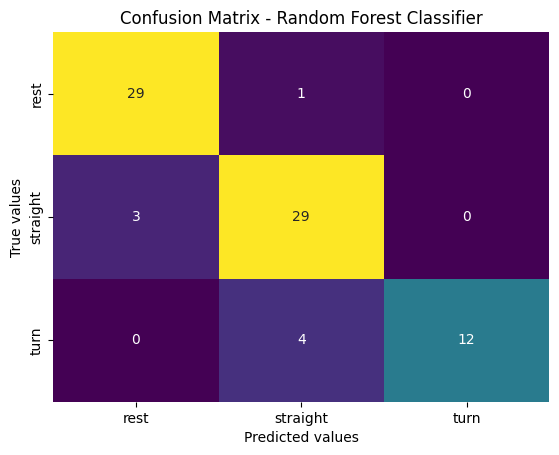


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.91      0.97      0.94        30
    straight       0.85      0.91      0.88        32
        turn       1.00      0.75      0.86        16

    accuracy                           0.90        78
   macro avg       0.92      0.87      0.89        78
weighted avg       0.90      0.90      0.90        78


Accuracy Score: 0.8974358974358975
Precision Score: 0.9197303921568628
Recall Score: 0.8743055555555556
F1 Score: 0.8904715356328259
Test-set score RFC: 0.897436


In [286]:
# Original Dataset results
evaluate_classification(y_test, RFC_best_estimator.predict(X_test), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X_test, y_test)))

# ENTER ANALYSIS HERE

### Random Forest Classifier results on First Independent Testing Dataset (testing_set1)

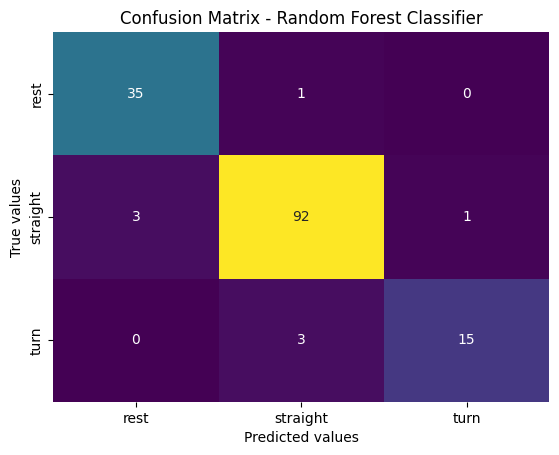


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.92      0.97      0.95        36
    straight       0.96      0.96      0.96        96
        turn       0.94      0.83      0.88        18

    accuracy                           0.95       150
   macro avg       0.94      0.92      0.93       150
weighted avg       0.95      0.95      0.95       150


Accuracy Score: 0.9466666666666667
Precision Score: 0.9389619883040936
Recall Score: 0.9212962962962963
F1 Score: 0.9288774068185832
Test-set score RFC: 0.946667


In [287]:
testing_set1 = pd.read_csv('data/testing.csv')
y2 = testing_set1['motion_state'].copy()
X2 = testing_set1[[col for col in testing_set1.columns if col !='motion_state']].copy()

#Dataset 2 results
evaluate_classification(y2, RFC_best_estimator.predict(X2), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X2, y2)))


# ENTER ANALYSIS HERE

### Random Forest Classifier results on Second Independent Testing Dataset (testing_set2)

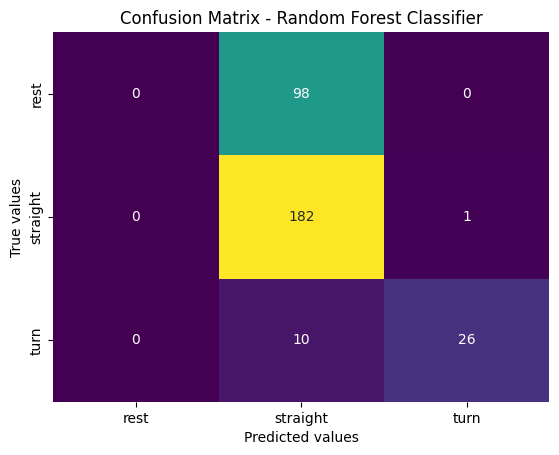


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        98
    straight       0.63      0.99      0.77       183
        turn       0.96      0.72      0.83        36

    accuracy                           0.66       317
   macro avg       0.53      0.57      0.53       317
weighted avg       0.47      0.66      0.54       317


Accuracy Score: 0.6561514195583596
Precision Score: 0.5301830566198382
Recall Score: 0.5722525804493017
F1 Score: 0.5316509502556014
Test-set score RFC: 0.656151


c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\an

In [288]:
testing_set2 = pd.read_csv('data/testing2.csv')
y3 = testing_set2['motion_state'].copy()
X3 = testing_set2[[col for col in testing_set2.columns if col !='motion_state']].copy()

#Dataset 3 results
evaluate_classification(y3, RFC_best_estimator.predict(X3), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X3, y3)))



# ENTER ANALYSIS HERE